In [2]:
import h5py
import numpy as np
import torch
from func_data_generation import get_field_data, plot_heatmap
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# load data
f = h5py.File("./data/datasets_1.hd5f", "r")
train_X = f["train_X"][...]
train_y = f["train_y"][...]
coords = f["coords"][...]

In [27]:
ok = OrdinaryKriging(
    train_X[:, 0], train_X[:, 1], train_y, variogram_model="exponential"
)

In [28]:
predict, ss = ok.execute("points", coords[:, 0], coords[:, 1])

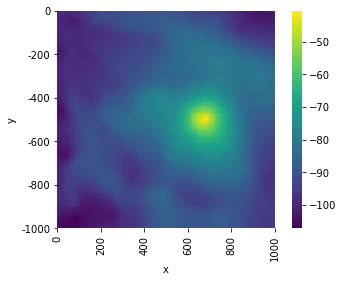

In [29]:
fig, ax = plt.subplots()
plot_heatmap(coords, predict, ax=ax, cbar=True)

In [36]:
np.delete

masked_array(data=[7435.915885571871, 14478.345525975055,
                   1984.9693421685988, ..., -4441.251568185111,
                   2979.191015808905, -9921.143471616091],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [24]:
uk = UniversalKriging(train_X[:, 0], train_X[:, 1], train_y, variogram_model="gaussian")
predict_uk, ss = ok.execute("points", coords[:, 0], coords[:, 1])

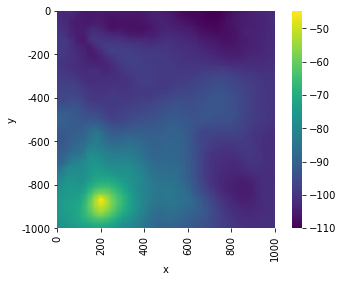

In [25]:
fig, ax = plt.subplots()
plot_heatmap(coords, predict_uk, ax=ax, cbar=True)